<a href="https://colab.research.google.com/github/adhang/data-science-digital-skola/blob/update/19.%20Machine%20Learning/Learn%20-%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learn - Clustering
Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)

___

# Importing Libraries

In [43]:
!pip install kneed
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 5.0 MB/s 


In [44]:
# basic
import pandas as pd
import numpy as np
import scipy.stats as stats

# viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

# metrics
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

# Reading Dataset
Dataset from [Kaggle](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

In [3]:
path = 'https://raw.githubusercontent.com/ganjar87/data_science_practice/main/CC%20GENERAL.csv'

data = pd.read_csv(path)
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.columns = data.columns.str.lower()

data.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# EDA & Data Preprocessing

## Basic Info

In [5]:
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

In [7]:
data.drop('cust_id', axis=1, inplace=True)
data.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
balance,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
balance_frequency,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
purchases,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
oneoff_purchases,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
installments_purchases,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
cash_advance,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
purchases_frequency,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
oneoff_purchases_frequency,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
purchases_installments_frequency,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
cash_advance_frequency,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


## Box Plot

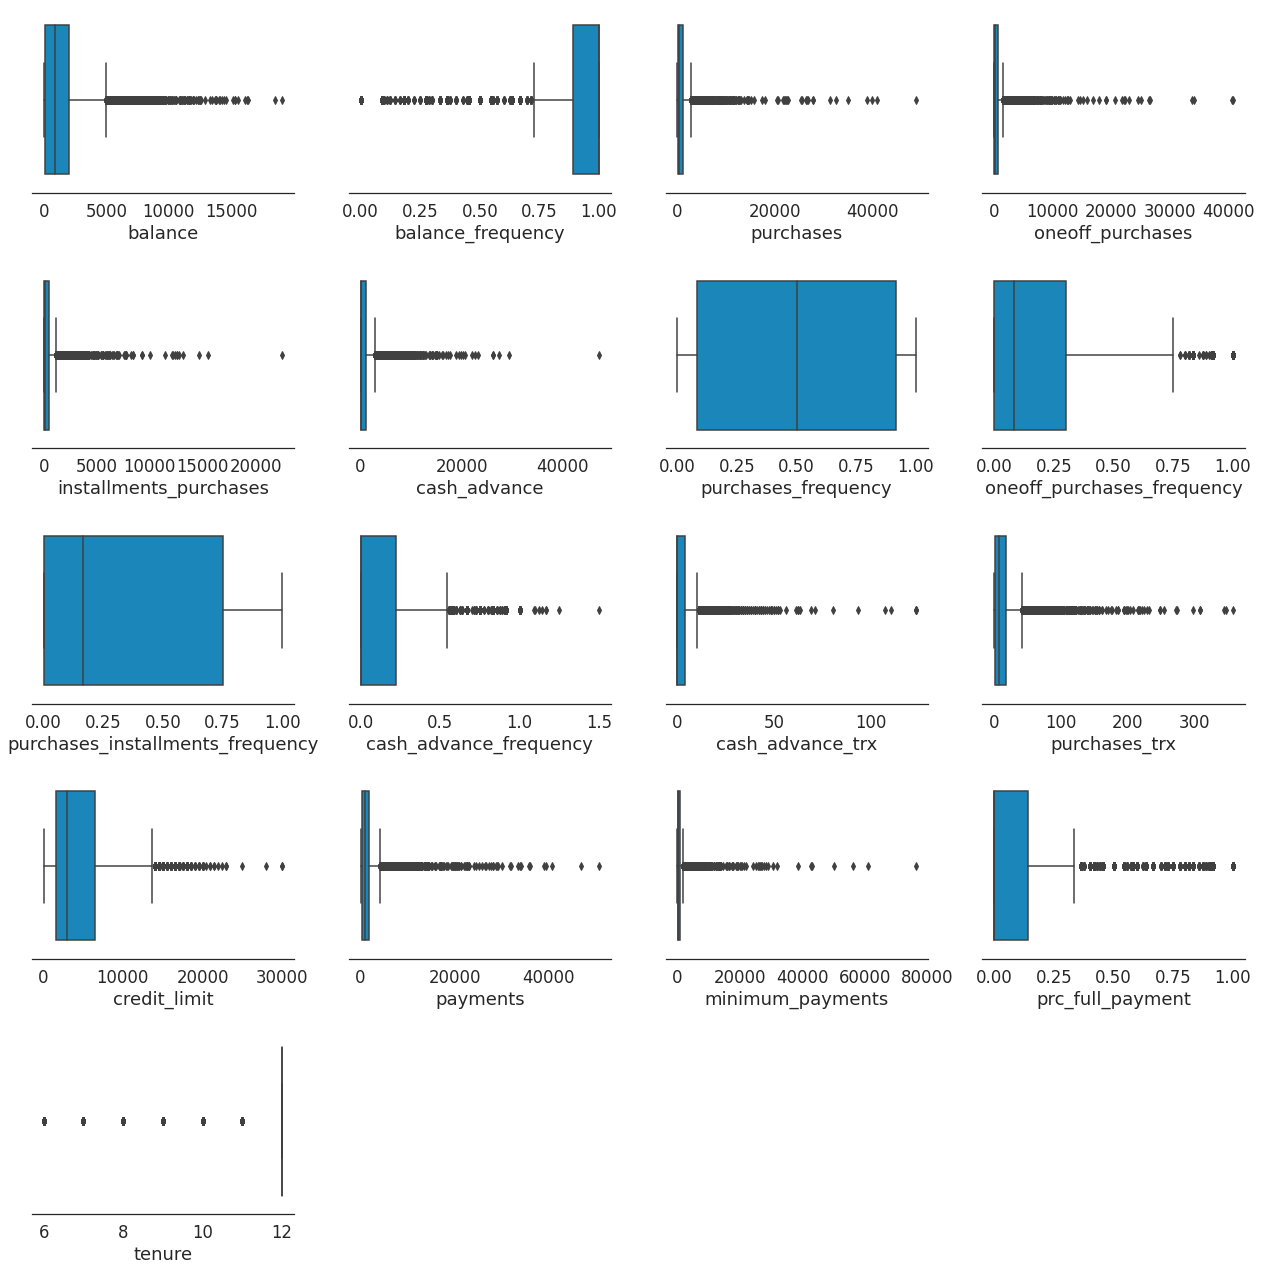

In [9]:
fig, ax = plt.subplots(5,4, figsize=(18,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(list(data.columns)):
  sns.boxplot(data=data, x=col, ax=axes_list[i])

axes_list[-1].set_visible(False)
axes_list[-2].set_visible(False)
axes_list[-3].set_visible(False)

sns.despine(left=True)
plt.tight_layout()
plt.show()

## Fill Missing Values

In [10]:
data.isna().sum()

balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [11]:
data.fillna(data.median(), inplace=True)

In [12]:
data.isna().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

## Histogram

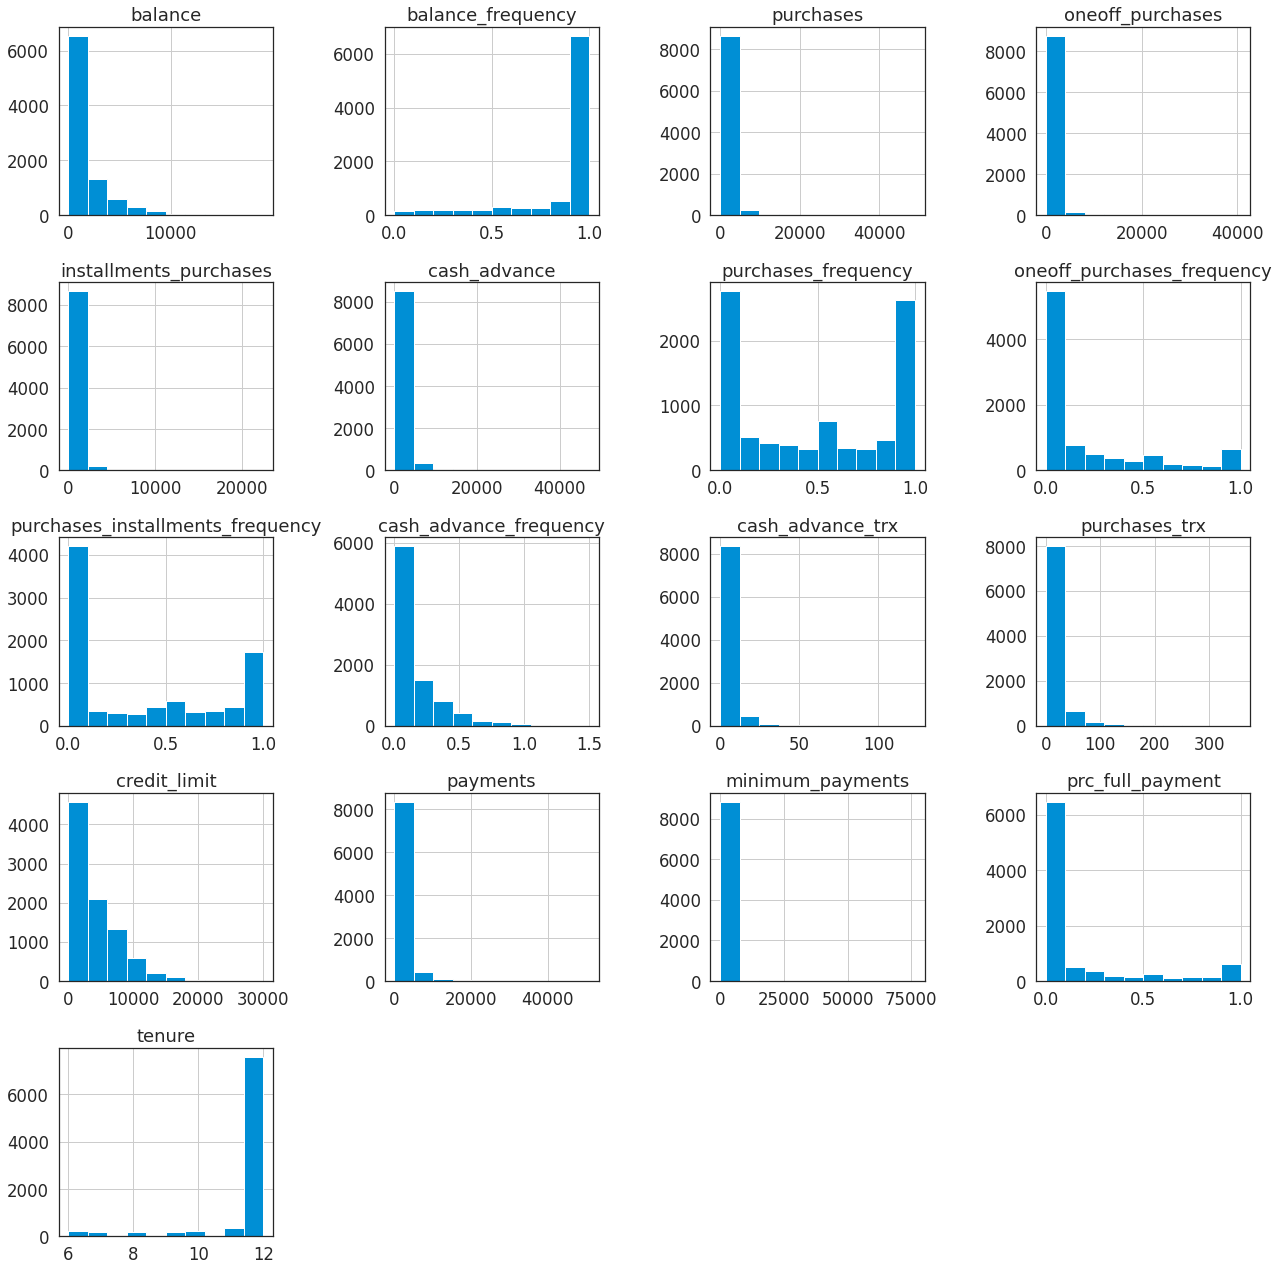

In [13]:
data.hist(figsize=(18,18))

plt.tight_layout()
plt.show()

## Density Plot

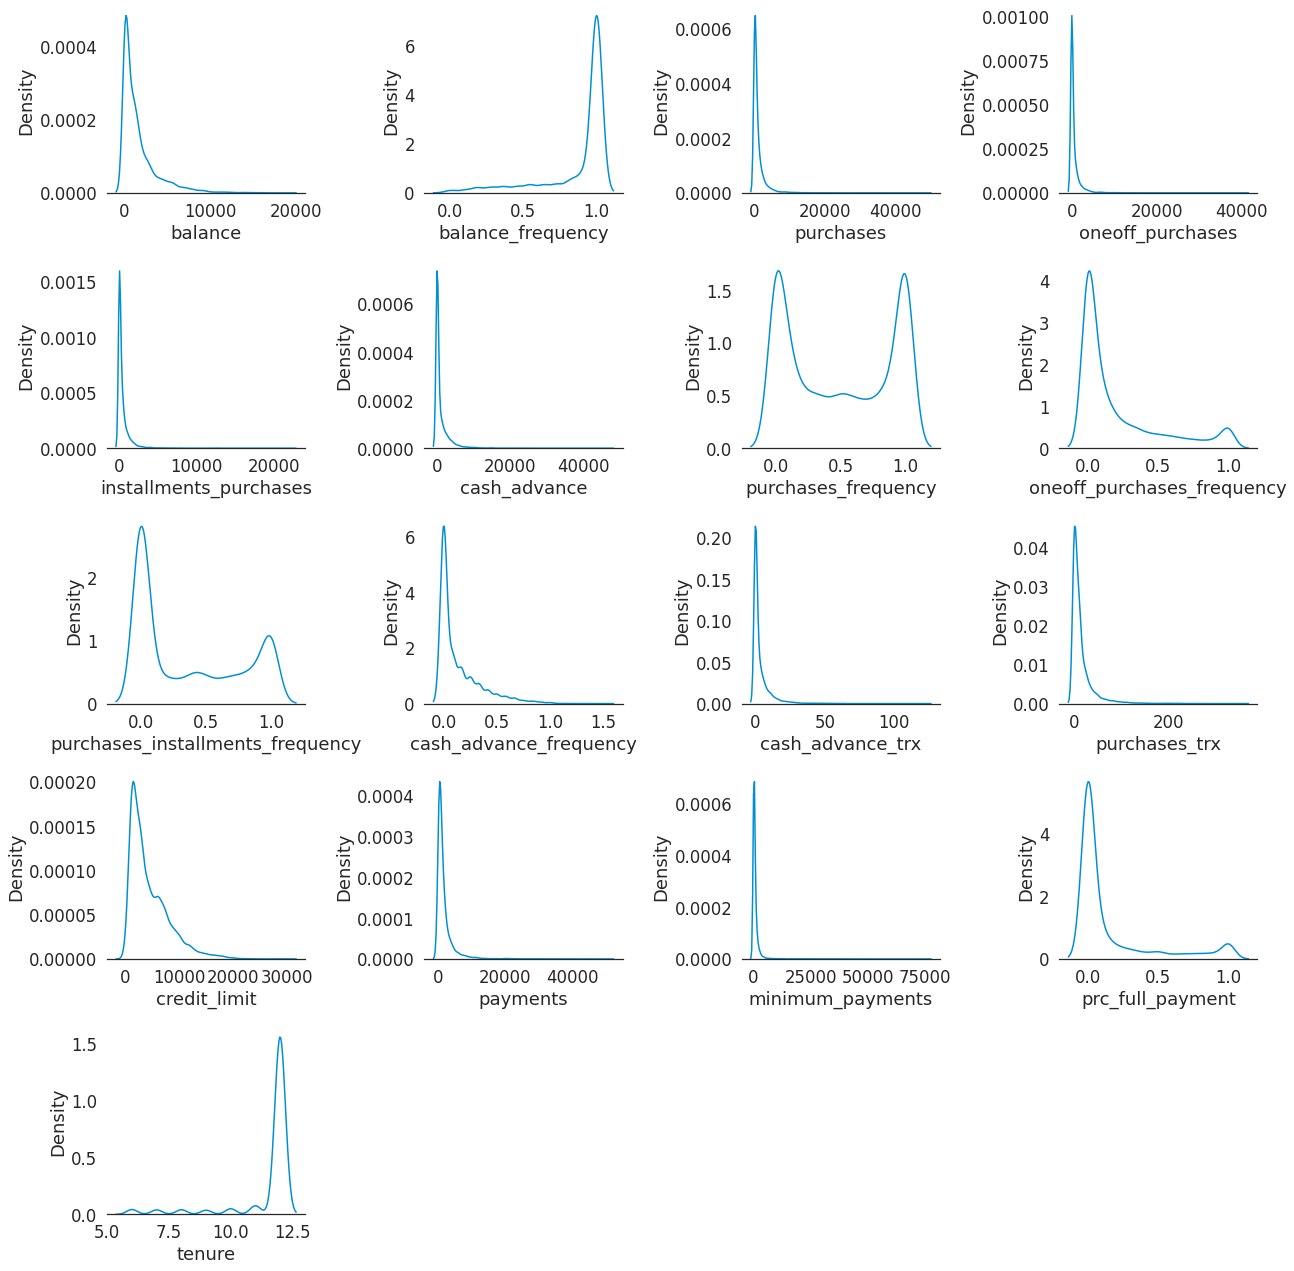

In [14]:
fig, ax = plt.subplots(5,4, figsize=(18,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(list(data.columns)):
  sns.kdeplot(data=data, x=col, ax=axes_list[i])

axes_list[-1].set_visible(False)
axes_list[-2].set_visible(False)
axes_list[-3].set_visible(False)

sns.despine(left=True)
plt.tight_layout()
plt.show()

## Heatmap Correlation

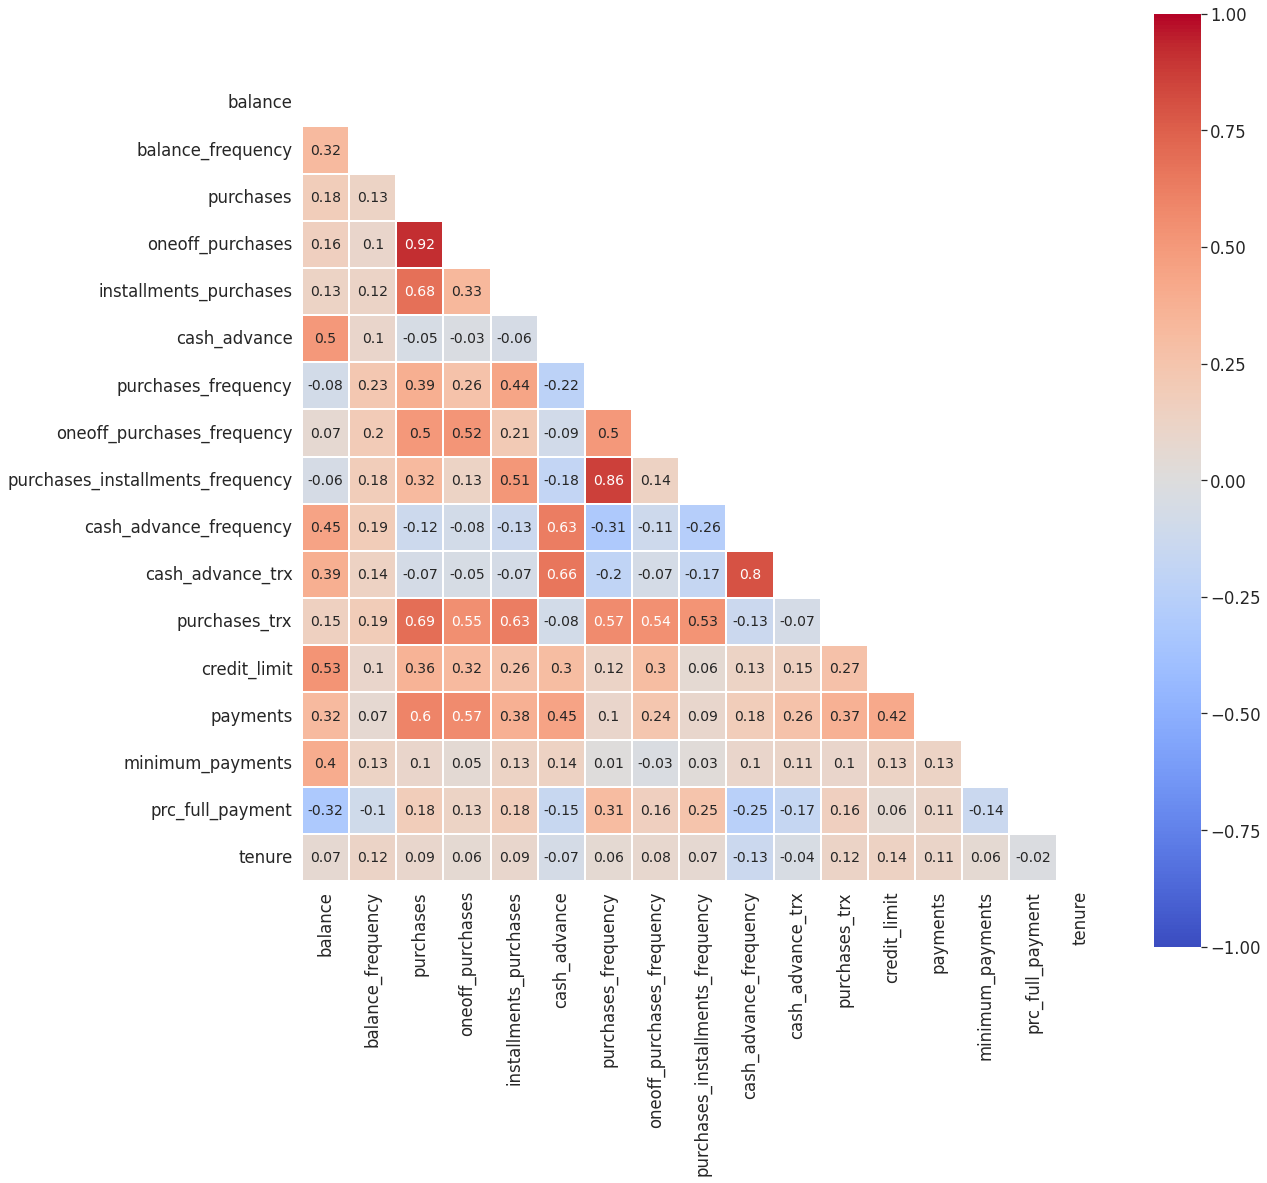

In [15]:
corr_matrix = data.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(16,16))

sns.heatmap(corr_matrix.round(2), center=0, vmin=-1, vmax=1, mask=mask,
            annot=True, square=True, linewidth=1, cmap='coolwarm',
            annot_kws={'fontsize':14}, ax=ax)

plt.show()

## Feature Scaling

### Standardization

In [16]:
data_std = data.copy()

for i in data_std.columns:
  scaler = StandardScaler()
  scaler.fit(data_std[[i]])

  data_std[[i]] = scaler.transform(data_std[[i]])

data_std.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


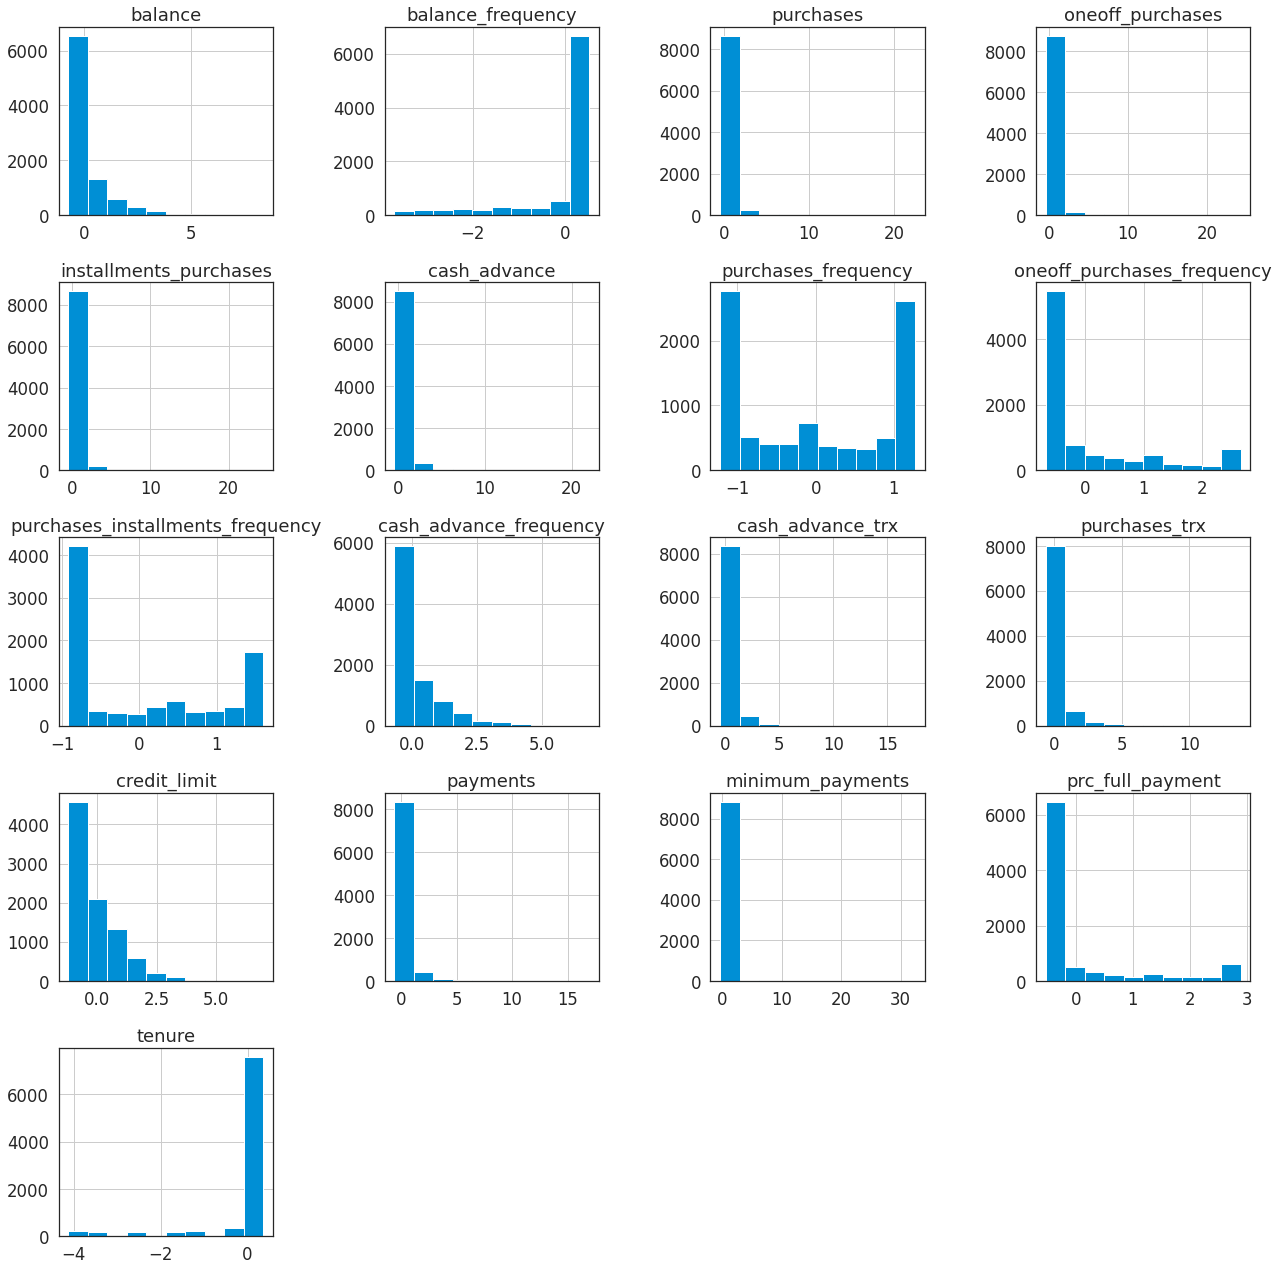

In [17]:
data_std.hist(figsize=(18,18))

plt.tight_layout()
plt.show()

### Normalization

In [18]:
data_norm = data_std.copy()

for i in data_norm.columns:
  scaler = MinMaxScaler()
  scaler.fit(data_norm[[i]])

  data_norm[[i]] = scaler.transform(data_norm[[i]])

data_norm.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004088,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


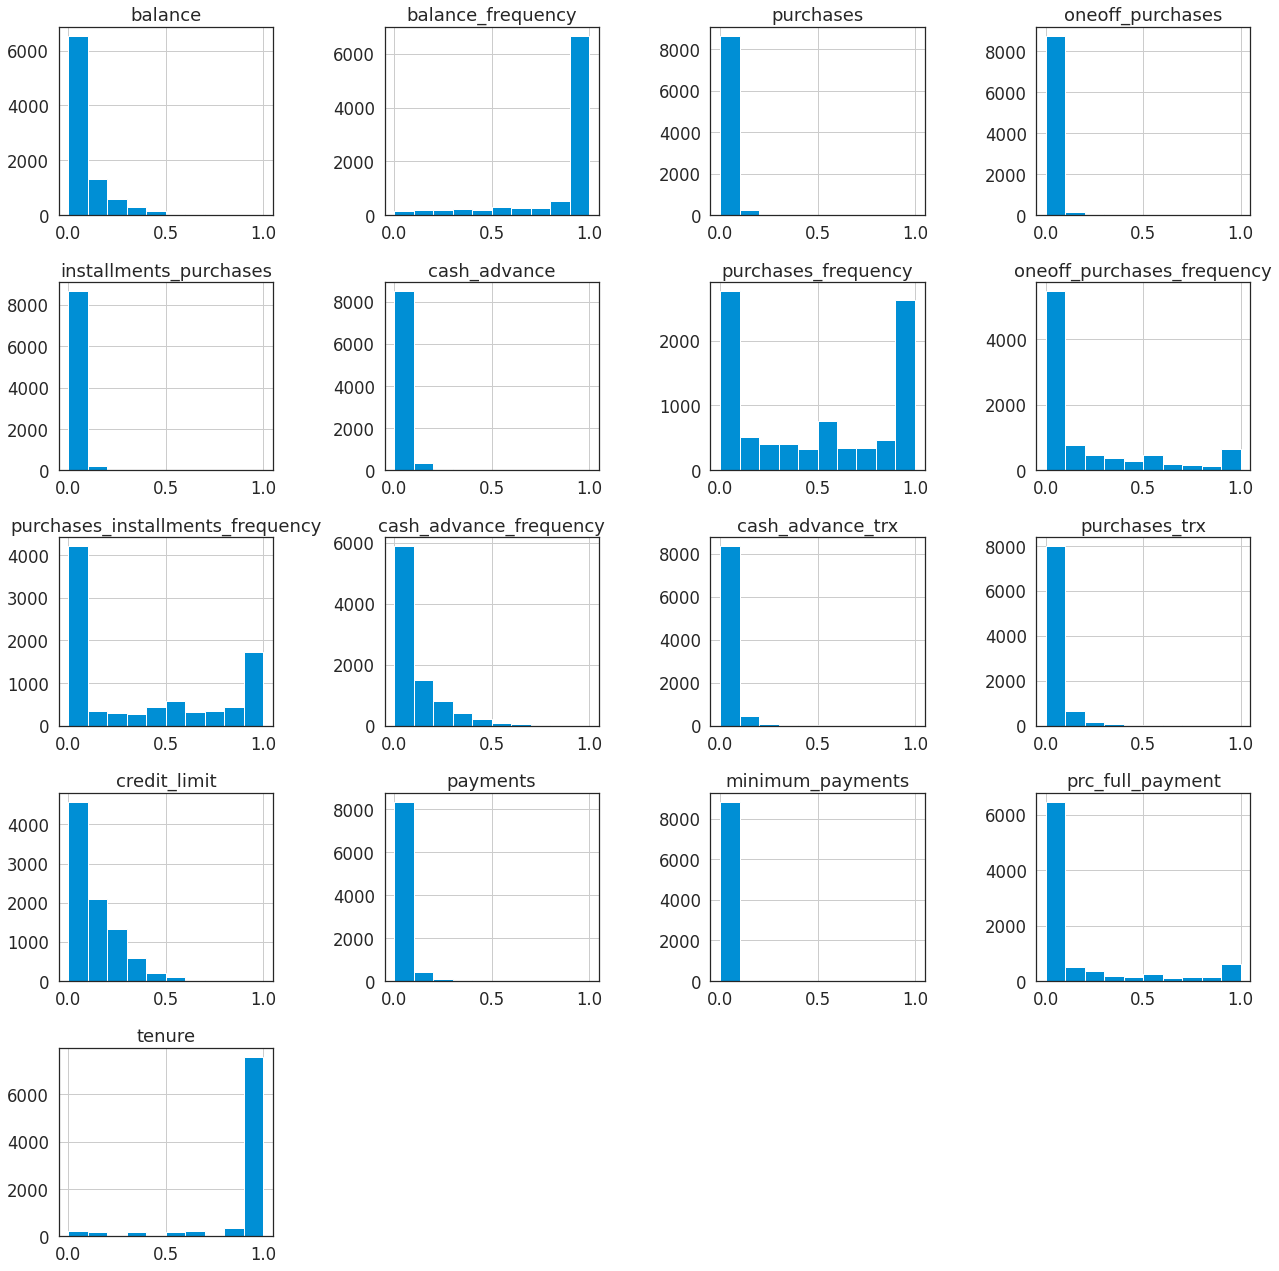

In [19]:
data_norm.hist(figsize=(18,18))

plt.tight_layout()
plt.show()

## Feature Array

In [20]:
X_std = data_std.values
X_std

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

In [21]:
X_norm = data_norm.values
X_norm

array([[2.14779454e-03, 8.18182000e-01, 1.94536779e-03, ...,
        1.82564563e-03, 0.00000000e+00, 1.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        1.40344791e-02, 2.22222000e-01, 1.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.57662475e-02, ...,
        8.20961806e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 2.94456089e-03, ...,
        1.07843629e-03, 2.50000000e-01, 0.00000000e+00],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        7.29475795e-04, 2.50000000e-01, 0.00000000e+00],
       [1.95717777e-02, 6.66667000e-01, 2.22932216e-02, ...,
        1.15527021e-03, 0.00000000e+00, 0.00000000e+00]])

# K-Means

## Elbow Method

In [69]:
inertia_list = []
k_range = np.arange(1,11)

for num_clusters in k_range:
    model = KMeans(n_clusters=num_clusters)
    model.fit(X_std)
    inertia_list.append(model.inertia_)
    print(f'For n_clusters = {num_clusters}, inertia value is {round(model.inertia_,3)}')

For n_clusters = 1, inertia value is 152150.0
For n_clusters = 2, inertia value is 127784.71
For n_clusters = 3, inertia value is 111973.99
For n_clusters = 4, inertia value is 99061.94
For n_clusters = 5, inertia value is 91490.201
For n_clusters = 6, inertia value is 84826.592
For n_clusters = 7, inertia value is 79506.472
For n_clusters = 8, inertia value is 75062.164
For n_clusters = 9, inertia value is 69935.872
For n_clusters = 10, inertia value is 67074.091


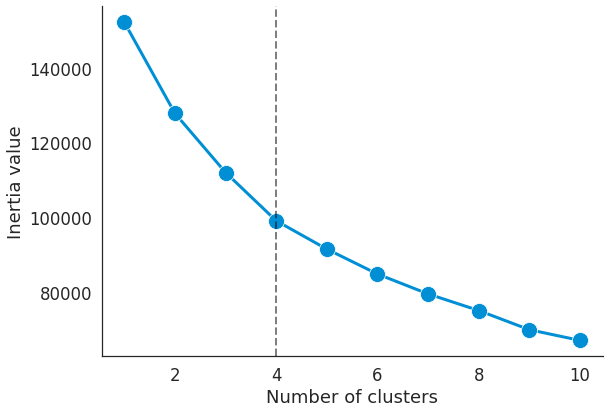

In [70]:
knee_locator = KneeLocator(np.arange(1,11), inertia_list,
                           S=1.0, curve='convex', direction='decreasing')

fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x=knee_locator.x, y=knee_locator.y,
             marker='o', linewidth=3, markersize=16, ax=ax)

for i in knee_locator.all_knees:
  ax.axvline(i, linewidth=2, linestyle='dashed', color='black', alpha=0.5)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia value')

sns.despine()
plt.show()

Cluster `4` is the knee location.

## Silhouette Method

In [71]:
sh_list = []
k_range = np.arange(2,11)

for num_clusters in k_range:
    model = KMeans(n_clusters=num_clusters)
    cluster_labels = model.fit_predict(X_std)
   
    score = silhouette_score(X_std, cluster_labels)
    sh_list.append(score)
    print(f'For n_clusters = {num_clusters}, silhouette score is {round(score, 3)}')

For n_clusters = 2, silhouette score is 0.21
For n_clusters = 3, silhouette score is 0.251
For n_clusters = 4, silhouette score is 0.198
For n_clusters = 5, silhouette score is 0.193
For n_clusters = 6, silhouette score is 0.203
For n_clusters = 7, silhouette score is 0.215
For n_clusters = 8, silhouette score is 0.222
For n_clusters = 9, silhouette score is 0.226
For n_clusters = 10, silhouette score is 0.227


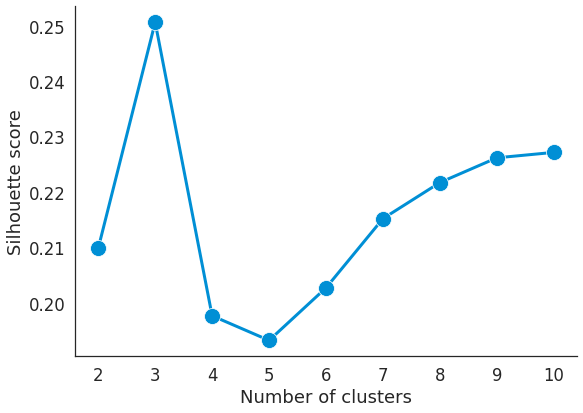

In [72]:
fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x=k_range, y=sh_list,
             marker='o', linewidth=3, markersize=16, ax=ax)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')

sns.despine()
plt.show()

Cluster `3` has the highest score.

## Build Model
Using the number of clusters from the silhouette method.

In [73]:
model = KMeans(n_clusters=3, random_state=1)

model.fit(X_std)

KMeans(n_clusters=3, random_state=1)

### Assign Cluster Label

In [74]:
data_std['kmeans_cluster'] = model.labels_
data['kmeans_cluster'] = model.labels_

data_std.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster,kmeans_cluster
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068,1,0
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068,3,2
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068,2,0
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068,0,0
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068,1,0


### Cluster Centroids

In [75]:
model.cluster_centers_

array([[-0.36731642, -0.17787754, -0.23282592, -0.20423149, -0.1752026 ,
        -0.30844131, -0.06348159, -0.23450413, -0.04936926, -0.33333817,
        -0.29794031, -0.24379206, -0.33582207, -0.28387045, -0.13798259,
         0.0075366 , -0.0293445 ],
       [ 0.31355698,  0.43957437,  1.53272183,  1.28483658,  1.26321082,
        -0.24895478,  1.14299351,  1.56498625,  0.95714984, -0.36154366,
        -0.25316843,  1.6858525 ,  0.88917962,  0.83939941,  0.16172214,
         0.4965178 ,  0.30296579],
       [ 1.17066705,  0.34474528, -0.28796198, -0.2065428 , -0.30149591,
         1.37855258, -0.63837435, -0.30641953, -0.54915808,  1.56124398,
         1.3414171 , -0.36402047,  0.60507904,  0.44369927,  0.40583871,
        -0.41236261, -0.12106352]])

## Visualization

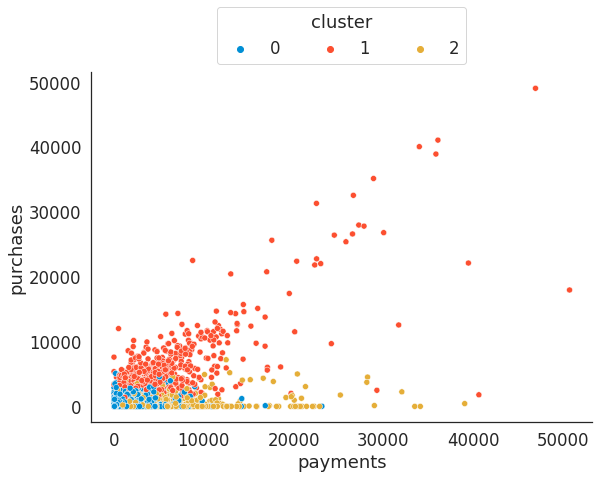

In [76]:
palette = ['#008FD5', '#FC4F30', '#E5AE38'] # blue, red, yellow

fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(data=data, x='payments', y='purchases', hue='kmeans_cluster', palette=palette, ax=ax)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3, title='cluster')

sns.despine()
plt.show()

# K-Medoids

## Elbow Method

In [77]:
inertia_list = []
k_range = np.arange(1,11)

for num_clusters in k_range:
    model = KMedoids(n_clusters=num_clusters)
    model.fit(X_std)
    inertia_list.append(model.inertia_)
    print(f'For n_clusters = {num_clusters}, inertia value is {round(model.inertia_,3)}')

For n_clusters = 1, inertia value is 32074.49
For n_clusters = 2, inertia value is 28502.252
For n_clusters = 3, inertia value is 26690.452
For n_clusters = 4, inertia value is 25312.68
For n_clusters = 5, inertia value is 24410.149
For n_clusters = 6, inertia value is 25045.96
For n_clusters = 7, inertia value is 23865.264
For n_clusters = 8, inertia value is 23728.761
For n_clusters = 9, inertia value is 21901.106
For n_clusters = 10, inertia value is 23064.596


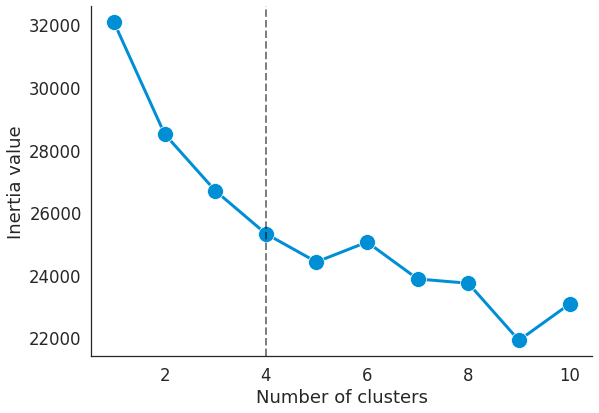

In [78]:
knee_locator = KneeLocator(np.arange(1,11), inertia_list,
                           S=1.0, curve='convex', direction='decreasing')

fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x=knee_locator.x, y=knee_locator.y,
             marker='o', linewidth=3, markersize=16, ax=ax)

for i in knee_locator.all_knees:
  ax.axvline(i, linewidth=2, linestyle='dashed', color='black', alpha=0.5)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia value')

sns.despine()
plt.show()

Cluster `4` is the knee location.

## Silhouette Method

In [79]:
sh_list = []
k_range = np.arange(2,11)

for num_clusters in k_range:
    model = KMedoids(n_clusters=num_clusters)
    cluster_labels = model.fit_predict(X_std)
   
    score = silhouette_score(X_std, cluster_labels)
    sh_list.append(score)
    print(f'For n_clusters = {num_clusters}, silhouette score is {round(score, 3)}')

For n_clusters = 2, silhouette score is 0.195
For n_clusters = 3, silhouette score is 0.16
For n_clusters = 4, silhouette score is 0.137
For n_clusters = 5, silhouette score is 0.149
For n_clusters = 6, silhouette score is 0.075
For n_clusters = 7, silhouette score is 0.051
For n_clusters = 8, silhouette score is 0.039
For n_clusters = 9, silhouette score is 0.085
For n_clusters = 10, silhouette score is 0.035


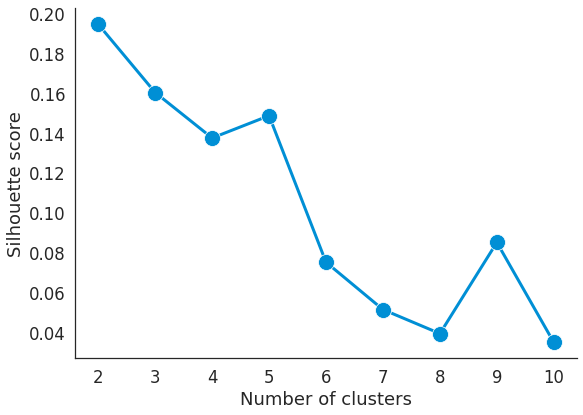

In [80]:
fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x=k_range, y=sh_list,
             marker='o', linewidth=3, markersize=16, ax=ax)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')

sns.despine()
plt.show()

Cluster `3` has the highest score.

## Build Model
Using the number of clusters from the elbow method.

In [81]:
model = KMedoids(n_clusters=4, random_state=1)

model.fit(X_std)

KMedoids(n_clusters=4, random_state=1)

### Assign Cluster Label

In [82]:
data_std['kmedoids_cluster'] = model.labels_
data['kmedoids_cluster'] = model.labels_

data_std.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster,kmeans_cluster,kmedoids_cluster
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068,1,0,1
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068,3,2,3
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068,2,0,2
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068,0,0,0
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068,1,0,1


### Cluster Centroids

In [83]:
model.cluster_centers_

array([[-0.73017008, -1.78447531, -0.15174467,  0.01660604, -0.3893315 ,
        -0.46678555, -0.39122513, -0.39931927, -0.49762862, -0.67534886,
        -0.47606982, -0.39063931, -0.20456068, -0.35069111, -0.32756103,
         0.50015018,  0.36067954],
       [-0.04321221,  0.51808382, -0.41993839, -0.29307072, -0.45457623,
        -0.44947139, -1.01412545, -0.39931927, -0.91699519, -0.25891333,
        -0.18299798, -0.51133325, -0.41069279, -0.47801089, -0.17593333,
        -0.52555097,  0.36067954],
       [-0.65121444,  0.51808382,  0.24224266,  0.03901242,  0.50039651,
        -0.46678555,  1.06221062,  0.15936716,  1.38951716, -0.67534886,
        -0.47606982,  0.37375564, -0.27327139,  0.0131038 , -0.2796588 ,
         0.04428414,  0.36067954],
       [ 1.16410803,  0.51808382, -0.40096824, -0.32982224, -0.3423    ,
         0.80421891, -0.18359002, -0.39931927, -0.2879466 ,  1.8232743 ,
         0.69621752, -0.350408  ,  0.41383563, -0.14385479,  0.17482124,
        -0.52555097

## Visualization

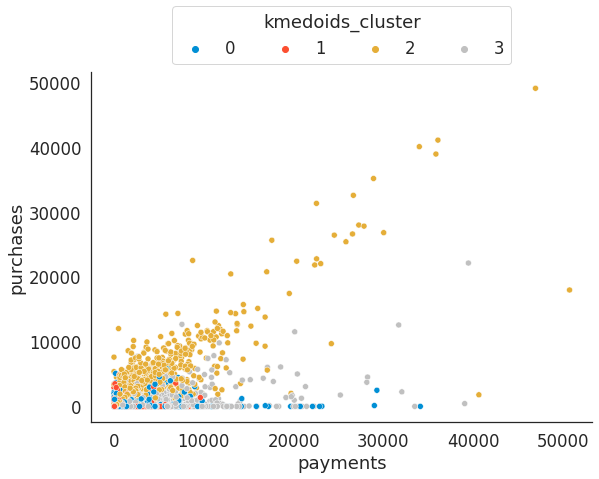

In [84]:
palette = ['#008FD5', '#FC4F30', '#E5AE38', 'silver'] # blue, red, yellow

fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(data=data, x='payments', y='purchases', hue='kmedoids_cluster', palette=palette, ax=ax)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=4, title='kmedoids_cluster')

sns.despine()
plt.show()

In [85]:
data_agg = data.groupby('kmedoids_cluster').sum()

data_agg.T.style.background_gradient(cmap='Blues', axis=1)

kmedoids_cluster,0,1,2,3
balance,186187.477912,3507307.436465,3576875.065052,6731679.728290
balance_frequency,633.070759,2541.184695,3106.264811,1571.052729
purchases,624164.630000,729117.470000,6615989.420000,1009411.740000
oneoff_purchases,398594.780000,599644.290000,3654338.290000,649737.110000
installments_purchases,225866.650000,130238.060000,2963174.410000,359776.300000
cash_advance,461837.348922,1435731.198203,614519.273017,6248808.636424
purchases_frequency,469.737636,459.188114,2946.417960,513.293698
oneoff_purchases_frequency,143.816131,277.567965,1139.290855,251.321317
purchases_installments_frequency,311.376012,181.001324,2435.852581,333.484290
cash_advance_frequency,52.059521,302.647612,117.789444,737.044016


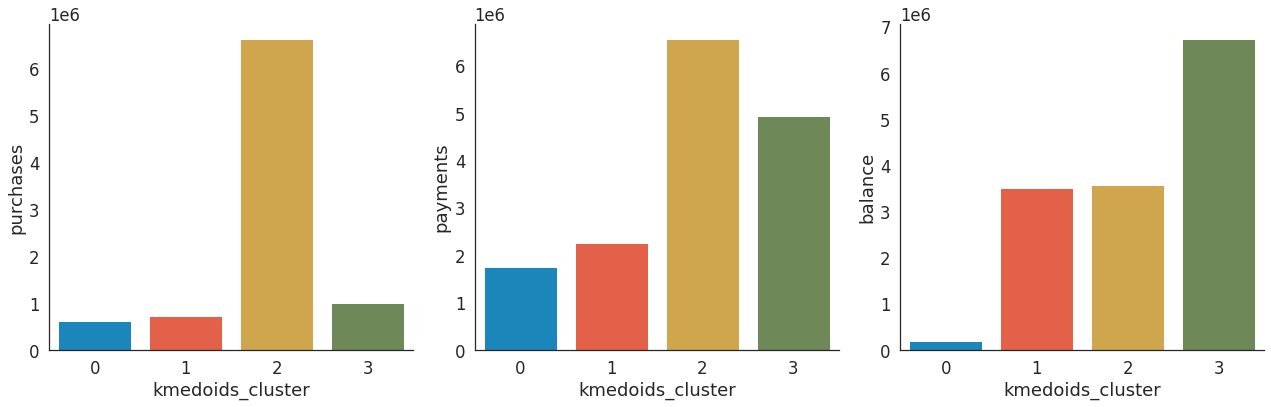

In [91]:
column_list = ['purchases', 'payments', 'balance']

fig, ax = plt.subplots(1,3, figsize=(18,6))

for i, col in enumerate(column_list):
  sns.barplot(data=data_agg.reset_index(), x='kmedoids_cluster', y=col, ax=ax[i])

sns.despine()
plt.tight_layout()
plt.show()

## Interpretation
- Cluster 0: having the lowest amount of purchases, payments, and balance
- Cluster 1: having a moderate amount of purchases, payments, and balance
- Cluster 2: having the highest amount of purchases and payments, but a moderate amount of balance
- Cluster 3: having a moderate amount of purchases and payments, but the highest amount of balance